In [2]:
import csv
with open('mushrooms.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        print(lines)

['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
['p', 'x', 's', 'n', 't', 'p', 'f', 'c', 'n', 'k', 'e', 'e', 's', 's', 'w', 'w', 'p', 'w', 'o', 'p', 'k', 's', 'u']
['e', 'x', 's', 'y', 't', 'a', 'f', 'c', 'b', 'k', 'e', 'c', 's', 's', 'w', 'w', 'p', 'w', 'o', 'p', 'n', 'n', 'g']
['e', 'b', 's', 'w', 't', 'l', 'f', 'c', 'b', 'n', 'e', 'c', 's', 's', 'w', 'w', 'p', 'w', 'o', 'p', 'n', 'n', 'm']
['p', 'x', 'y', 'w', 't', 'p', 'f', 'c', 'n', 'n', 'e', 'e', 's', 's', 'w', 'w', 'p', 'w', 'o', 'p', 'k', 's', 'u']
['e', 'x', 's', 'g', 'f', 'n', 'f', 'w', 'b', 'k', 't', 'e', 's', 's', 'w', 'w', 'p', 'w', 'o', 'e', 'n', 'a', 'g']
['e', 'x', 'y', 'y', 't', 'a', 'f', 'c', 'b', 'n',

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('mushrooms.csv')

# Check for missing values

missing_count = 0
not_missing_count = 0

for n in data:
    if pd.isna(n) or str(n).strip().lower() in ['nan', 'none', '']:
        missing_count += 1
    else:
        not_missing_count += 1

print("Missing:", missing_count)
print("Not missing:", not_missing_count)

Missing: 0
Not missing: 23


Confusion Matrix:
[[843   0]
 [  0 782]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       843
        True       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



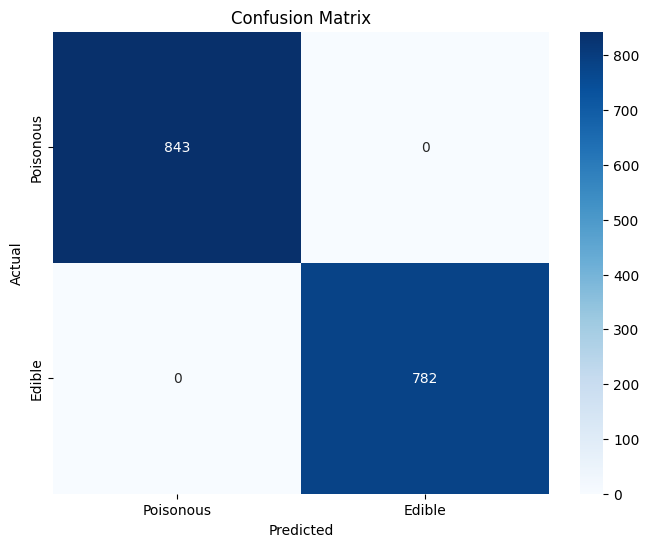

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('mushrooms.csv')

# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Separate features and target variable
X = data_encoded.drop('class_p', axis=1)  # Features (assuming 'class_p' is the target)
y = data_encoded['class_p']  # Target variable (edibility)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nClassification Report:")
class_report = classification_report(y_test, y_pred)
print(class_report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Poisonous', 'Edible'], yticklabels=['Poisonous', 'Edible'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [6]:
print(len((data.columns)))

23


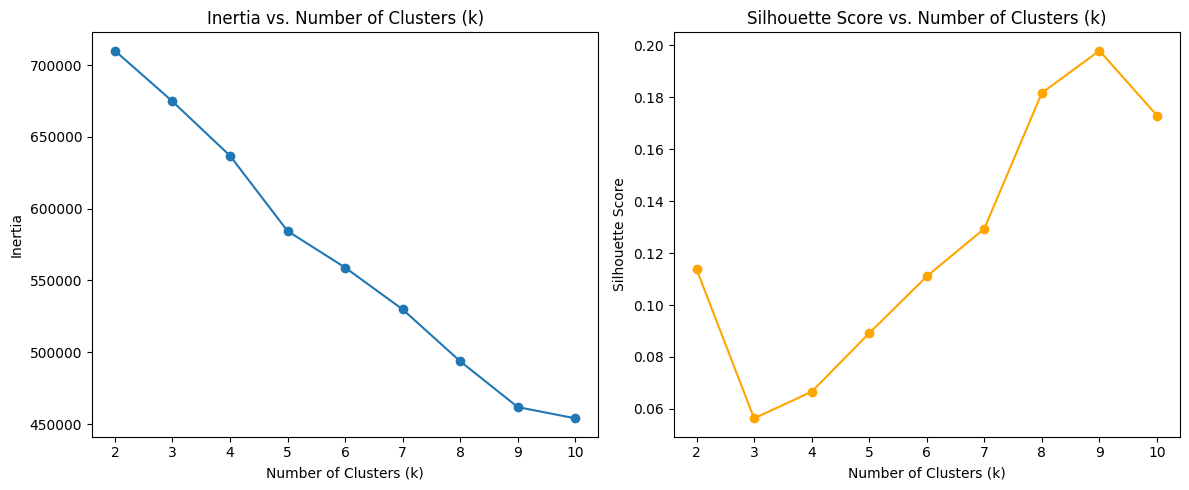

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('mushrooms.csv')

# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Separate features (X) and target variable (y) - we won't use y for clustering
X = data_encoded.drop('class_p', axis=1)  # Drop target variable

# Standardize the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define a range of values for k
k_values = range(2, 11)  # Trying k from 2 to 10
inertia = []
silhouette_scores = []

# Train K-Means for different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    # Calculate inertia (sum of squared distances to closest centroid)
    inertia.append(kmeans.inertia_)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plotting the results for evaluation
plt.figure(figsize=(12, 5))

# Inertia Plot
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Inertia vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)

plt.tight_layout()
plt.show()

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the dataset
data = pd.read_csv('mushrooms.csv')

# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Separate features (X) and target variable (y)
X = data_encoded.drop('class_p', axis=1)  # Features
y = data_encoded['class_p']  # Target variable (edibility)

# Standardize the features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Fold Cross-Validation for Classification Model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
clf = DecisionTreeClassifier(random_state=42)

# Evaluate using cross_val_score for classification
classification_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
print("Classification Model Accuracy Scores:", classification_scores)
print("Mean Classification Accuracy:", np.mean(classification_scores))

# K-Fold Cross-Validation for Clustering Model
k_values = range(2, 11)  # Trying k from 2 to 10
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    fold_silhouette_scores = []

    for train_index, test_index in kf.split(X_scaled):
        X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
        kmeans.fit(X_train_fold)
        
        # Calculate silhouette score for the test fold
        score = silhouette_score(X_test_fold, kmeans.predict(X_test_fold))
        fold_silhouette_scores.append(score)

    # Average silhouette score for the current k
    silhouette_scores.append(np.mean(fold_silhouette_scores))

# Display silhouette scores for clustering
for k, score in zip(k_values, silhouette_scores):
    print(f"Average Silhouette Score for k={k}: {score:.4f}")

Classification Model Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Classification Accuracy: 1.0
Average Silhouette Score for k=2: 0.0947
Average Silhouette Score for k=3: 0.0986
Average Silhouette Score for k=4: 0.1190
Average Silhouette Score for k=5: 0.1392
Average Silhouette Score for k=6: 0.1588
Average Silhouette Score for k=7: 0.1672
Average Silhouette Score for k=8: 0.1486
Average Silhouette Score for k=9: 0.1639
Average Silhouette Score for k=10: 0.1797


In [9]:
# Remove Weak Features to improve silhouette score

from sklearn.feature_selection import VarianceThreshold

# Remove low-variance features
selector = VarianceThreshold(threshold=0.01)
X_selected = selector.fit_transform(X_scaled)

# Run K-Means
kmeans = KMeans(n_clusters=10, random_state=42, n_init=20)
labels = kmeans.fit_predict(X_selected)
score = silhouette_score(X_selected, labels)
print(f"Silhouette Score after feature filtering: {score:.4f}")


Silhouette Score after feature filtering: 0.2037


In [10]:
# PCA compresses the data into a lower-dimensional, 
# denser space — better suited for Euclidean distance.
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply PCA to reduce dimensionality
pca = PCA(n_components=10)  # Try adjusting this number
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means on PCA-transformed data
kmeans = KMeans(n_clusters=10, random_state=42, n_init=20)
labels = kmeans.fit_predict(X_pca)

# Evaluate with silhouette score
score = silhouette_score(X_pca, labels)
print(f"Silhouette Score after PCA: {score:.4f}")

Silhouette Score after PCA: 0.5882


In [11]:
# Analyse cases where K-Means is sensitive to initial centroids and 
# the impact of it on the accuracy score
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load and prepare data
data = pd.read_csv('mushrooms.csv')
data_encoded = pd.get_dummies(data, drop_first=True)
X = data_encoded.drop('class_p', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run K-Means multiple times with different random states
silhouette_scores = []

print("Testing K-Means with different random centroid initializations:\n")

# Based on the balance between inertia minimization (Elbow Method) and 
# acceptable silhouette score, k = 6 was selected as 
# the optimal number of clusters for this dataset.

for seed in [1, 10, 20, 42, 99]:
    kmeans = KMeans(n_clusters=6, init='k-means++', random_state=seed)
    kmeans.fit(X_scaled)
    labels = kmeans.predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"Random State {seed} - Silhouette Score: {score:.4f}")

Testing K-Means with different random centroid initializations:

Random State 1 - Silhouette Score: 0.1075
Random State 10 - Silhouette Score: 0.1487
Random State 20 - Silhouette Score: 0.1386
Random State 42 - Silhouette Score: 0.1110
Random State 99 - Silhouette Score: 0.1508


In [12]:
# Demonstrating the limitation of Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train-test split (to simulate generalization)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model 1: Deep Tree (default, likely overfitted)
deep_tree = DecisionTreeClassifier(random_state=42)
deep_tree.fit(X_train, y_train)
train_acc_deep = accuracy_score(y_train, deep_tree.predict(X_train))
test_acc_deep = accuracy_score(y_test, deep_tree.predict(X_test))

# Model 2: Pruned Tree (limited depth)
pruned_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
pruned_tree.fit(X_train, y_train)
train_acc_pruned = accuracy_score(y_train, pruned_tree.predict(X_train))
test_acc_pruned = accuracy_score(y_test, pruned_tree.predict(X_test))

# Display results
print(" Deep Tree Accuracy:")
print(f"  Train Accuracy: {train_acc_deep:.4f}")
print(f"  Test Accuracy:  {test_acc_deep:.4f}")

print("\n Pruned Tree Accuracy (max_depth=3):")
print(f"  Train Accuracy: {train_acc_pruned:.4f}")
print(f"  Test Accuracy:  {test_acc_pruned:.4f}")


 Deep Tree Accuracy:
  Train Accuracy: 1.0000
  Test Accuracy:  1.0000

 Pruned Tree Accuracy (max_depth=3):
  Train Accuracy: 0.9866
  Test Accuracy:  0.9820


Running K-Means with different k values...

k = 2 | Inertia: 709988.25 | Silhouette Score: 0.1138
k = 3 | Inertia: 674680.61 | Silhouette Score: 0.0564
k = 4 | Inertia: 636836.94 | Silhouette Score: 0.0666
k = 5 | Inertia: 584429.84 | Silhouette Score: 0.0892
k = 6 | Inertia: 559000.72 | Silhouette Score: 0.1110
k = 7 | Inertia: 529855.73 | Silhouette Score: 0.1294
k = 8 | Inertia: 493713.61 | Silhouette Score: 0.1817
k = 9 | Inertia: 461849.34 | Silhouette Score: 0.1980
k = 10 | Inertia: 454021.05 | Silhouette Score: 0.1730
k = 11 | Inertia: 442210.34 | Silhouette Score: 0.1778
k = 12 | Inertia: 435331.84 | Silhouette Score: 0.1473
k = 13 | Inertia: 430685.70 | Silhouette Score: 0.1476
k = 14 | Inertia: 406493.05 | Silhouette Score: 0.1511
k = 15 | Inertia: 389871.22 | Silhouette Score: 0.1588
k = 16 | Inertia: 377963.92 | Silhouette Score: 0.1708
k = 17 | Inertia: 373937.40 | Silhouette Score: 0.1826
k = 18 | Inertia: 367105.37 | Silhouette Score: 0.1835
k = 19 | Inertia: 355621.70 |

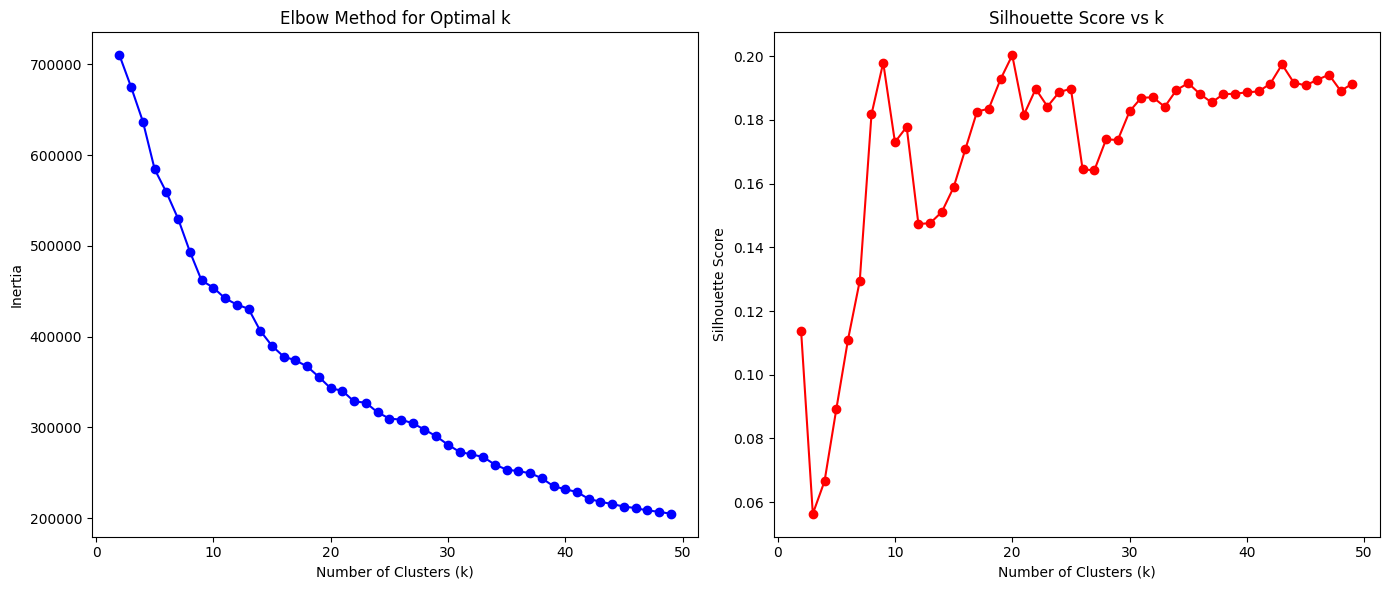

In [15]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define range of k values to test [wider range, 2 - 50]
k_values = range(2, 50)

# Store results for evaluation
inertias = []
silhouette_scores = {}

# Section 1: Running K-Means with different k values and fixed random state value of 42
print("Running K-Means with different k values...\n")

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    # Store inertia (used for Elbow Method)
    inertias.append(kmeans.inertia_)
    
    # Store silhouette score
    silhouette_scores[k] = silhouette_score(X_scaled, labels)
    
    print(f"k = {k} | Inertia: {kmeans.inertia_:.2f} | Silhouette Score: {silhouette_scores[k]:.4f}")

# Section 2: Evaluating K-Means results
print("\nEvaluating K-Means clustering performance...\n")

# Plot Elbow Method graph (Inertia vs k)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")

# Plot Silhouette Score vs k
plt.subplot(1, 2, 2)
plt.plot(k_values, list(silhouette_scores.values()), 'ro-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k")

plt.tight_layout()
plt.show()


Inertia steadily decreases as k increases. This is expected since more clusters result in smaller intra-cluster distances. There’s no sharp elbow, but the rate of decrease slows around k = 8 to 10, suggesting a good trade-off between compactness and simplicity.

Best silhouette score: k = 20 (0.2003) is the highest. The silhouette score increases up to k ≈ 20, then fluctuates with smaller variations.

Considering both Inertia and Silhouette scores, K= 8-10 would be optimal in ensuring a good cluster.




### When to Use Classification

Classification is used when the dataset has labeled data, meaning we already know the correct categories for each example. It is ideal for tasks where we need to assign new data points to predefined classes based on learned patterns. In the case of mushrooms, if we have labels indicating whether each mushroom is edible or poisonous, a classification model like a decision tree or support vector machine (SVM) would be the best choice to predict the correct category for new samples.

Examples:
- Email sorting (spam mail can be filtered out with certain keywords or patterns)
- Medical (categorising diseases based on symptoms)

### When to Use Clustering
Clustering is used when the dataset is unlabeled, and we want to find natural groupings within the data without predefined categories. In the mushroom dataset, if we did not have labels indicating edibility, clustering techniques like K-Means could help group similar mushrooms based on their features, which could later be analyzed to determine meaningful patterns. However, clustering alone would not tell us which groups are edible or poisonous without additional interpretation.


Examples:

- Clustering users for recommendation algorithms (Spotify, grouping similar music tastes together/ Shopee grouping similar type-buyers together)
- Anamoly detection, where an outlier that doesnt belong to any group can be easily identified